In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

In [23]:
df = pd.read_csv('data/data.csv')
millenial_df = df[(df['year'] >= 2010) & (df['year'] <= 2021)].sort_values(by='danceability')
dance_asc = millenial_df[(millenial_df['danceability'] >= .7) & (df['danceability'] < 1)]
dance_asc

/home/atlas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
17972,0.036900,"['Jeremih', '50 Cent']",0.700,228453,0.598,0,0x3TibRgnSqzkcwrqBd4iX,0.000000,2,0.1110,-7.783,1,Down On Me,70,2010-01-01,0.1140,160.041,0.5940,2010
18504,0.219000,"['Big Sean', 'Lil Wayne', 'Jhené Aiko']",0.700,235187,0.554,1,6bxUnsSGZCmoHHU5auwtps,0.000001,1,0.4190,-5.909,1,Beware,71,2013-01-01,0.1870,97.127,0.0633,2013
172032,0.001960,['L.B.G.'],0.700,194240,0.913,0,44W8eiQmIsUencJYnQAZvb,0.000041,5,0.0667,-5.120,0,Good As My Love - Single Edit,0,2013-03-22,0.0501,129.972,0.8730,2013
17811,0.055100,['Noisecontrollers'],0.700,368000,0.917,0,4qjUVWM2BgIIpVtoF9uhp5,0.024800,5,0.1180,-5.678,0,CTRL.ALT.DELETE (In Qontrol Anthem 2009),19,2020-02-03,0.0986,150.011,0.3860,2020
92704,0.010500,"['SMO', 'Alexander King']",0.700,214467,0.647,0,4fkUsaC0dJfHp5N1kIrZlr,0.000000,2,0.2510,-6.497,1,Workin' (feat. Alexander King),57,2014-06-03,0.0483,86.013,0.2420,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,0.002970,['Tone-Loc'],0.985,249464,0.914,0,2ui62KKhQgwsUF8afLpyXZ,0.000188,0,0.0408,-7.788,1,Funky Cold Medina - Re-Recorded,7,2010-12-21,0.1520,117.003,0.8050,2010
171536,0.022500,"['Dan McKie', 'Zigmund Slezak']",0.985,420000,0.725,0,0SjbmPZN8qUax64tIGod3G,0.307000,0,0.0687,-3.680,1,Dddance - Zigmund Slezak Remix,0,2013-01-07,0.2300,128.016,0.5910,2013
92739,0.124000,['Nilla Pizzi'],0.985,211620,0.522,0,2ppnJ8Wz2US6hbHGX61zy4,0.902000,8,0.1320,-10.259,1,O mama mama - Remix 2014,0,2014-11-27,0.2860,125.006,0.6910,2014
141441,0.145000,"['Pitbull', 'Trina', 'Young Bo']",0.986,229669,0.597,1,1MgM0WDaoQ2A3bnIQTR6ty,0.000002,8,0.1970,-6.809,1,Go Girl,52,2012-05-08,0.3080,115.004,0.7610,2012


# Grab Songs from year 2000+

In [24]:
millenial_df_2 = df[(df['year'] >= 2000) & (df['year'] < 2021)]
millenial_df_2

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9071,0.39400,['Gerry & The Pacemakers'],0.484,160187,0.265,0,6catF1lDhNTjjGa2GxRQNN,0.000000,0,0.149,-11.101,1,You'll Never Walk Alone - Mono; 2002 Remaster,55,2008-02-11,0.0322,113.564,0.285,2008
9081,0.25500,['Gerry & The Pacemakers'],0.405,141987,0.365,0,4aSw1QJIMwYSoDEgzgdCJL,0.000005,6,0.163,-10.226,0,Ferry Cross the Mersey - Mono; 2002 Remaster,39,2008-02-11,0.0289,104.536,0.588,2008
9085,0.40600,['Gerry & The Pacemakers'],0.477,157093,0.352,0,0ZMMtH875IR2TfkyC4PolD,0.000000,1,0.122,-14.165,1,Don't Let the Sun Catch You Crying (Main) - Mono,34,2008-02-11,0.0300,106.773,0.478,2008
9087,0.88700,['Frank Sinatra'],0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.904,-17.796,1,The September Of My Years - Live At The Sands ...,27,2018-05-04,0.0623,117.153,0.239,2018
9091,0.93800,['Frank Sinatra'],0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.683,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,2018-05-04,0.0576,82.332,0.160,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174380,0.04840,"['Stephan F', 'YA-YA']",0.693,177148,0.826,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.231,-2.669,1,Only Tonight - Radio Edit,0,2020-12-25,0.0762,126.049,0.361,2020
174382,0.14100,"['BigBankCarti', 'Keyvo400']",0.544,215014,0.407,1,3ASGdyWXeXsXtOIWtm0tv4,0.000000,4,0.253,-12.745,0,LayUp,0,2020-12-31,0.2330,129.750,0.490,2020
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020


# Popularity in Ascending Order from 10 - 100

In [25]:
popularity_asc = millenial_df_2[(millenial_df_2['popularity'] >= 30) & (millenial_df_2['popularity'] < 100)].sort_values(by="popularity")
popularity_asc

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
18323,0.03770,['Robin Trower'],0.469,155227,0.918,0,37ceBlpjYGerTCJ9EouxAY,0.000392,1,0.2400,-6.584,1,Farther on up the Road - 2012 Remaster,30,2012-02-27,0.1730,115.201,0.7700,2012
58403,0.00499,['Armin van Buuren'],0.397,36500,0.638,0,7tH6tGz6cQtpYReqHTlyjN,0.000000,2,0.3640,-7.256,1,A State Of Trance (ASOT 996) - Tune Of The Yea...,30,2020-12-24,0.1760,134.284,0.6770,2020
76483,0.00742,"['Above & Beyond', 'Zoë Johnston']",0.453,232272,0.756,0,1gULRv2VeyJJ0PRXoaydW6,0.064800,6,0.0555,-7.753,1,Reverie - Above & Beyond Club Mix,30,2020-12-11,0.0472,127.899,0.0557,2020
108469,0.10800,"['Iggy Azalea', 'Charli XCX']",0.912,199947,0.701,1,1rP6lEvizxVpJ6n722Ny0v,0.000000,8,0.0415,-4.154,1,Fancy,30,2020-12-16,0.0744,94.958,0.3890,2020
58385,0.06890,['Armin van Buuren'],0.591,31400,0.625,0,02KoPajd6lpRS0tmdJJluL,0.000000,0,0.6720,-7.557,1,A State Of Trance (ASOT 996) - Tune Of The Yea...,30,2020-12-24,0.3080,107.444,0.6250,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19928,0.03030,"['Bad Bunny', 'ROSALÍA']",0.856,203201,0.618,0,2XIc1pqjXV3Cr2BQUGNBck,0.000000,7,0.0866,-4.892,1,LA NOCHE DE ANOCHE,94,2020-11-27,0.2860,81.993,0.3910,2020
19886,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.1450,2020
19976,0.21200,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.8380,2020
19866,0.46800,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.6820,2020


# Visualizing the Mean of Select Elements in Relation to Ascending Popularity

In [26]:
pop_dance = popularity_asc[['artists','name','popularity','danceability']]
pop_dance

,artists,name,popularity,danceability
18323,['Robin Trower'],Farther on up the Road - 2012 Remaster,30,0.469
58403,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.397
76483,"['Above & Beyond', 'Zoë Johnston']",Reverie - Above & Beyond Club Mix,30,0.453
108469,"['Iggy Azalea', 'Charli XCX']",Fancy,30,0.912
58385,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.591
...,...,...,...,...
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94,0.856
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95,0.731
19976,['KAROL G'],BICHOTA,95,0.863
19866,['Ariana Grande'],positions,96,0.737


In [27]:
avg_dance = pop_dance.groupby('popularity').mean()
avg_dance

,danceability
popularity,
30,0.536581
31,0.606585
32,0.527000
33,0.516660
34,0.570953
...,...
92,0.779800
93,0.675500
94,0.789600


Text(0, 0.5, 'Danceability')

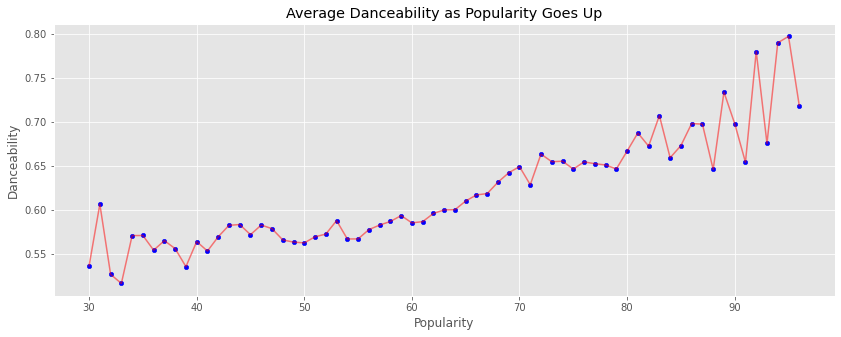

In [37]:
fig, ax = plt.subplots(figsize=(14,5),squeeze=True)

ax.plot(avg_dance.index, avg_dance.danceability,color='red',alpha=0.5)
ax.scatter(avg_dance.index, avg_dance.danceability,color='blue',s=20)
ax.set_title('Average Danceability as Popularity Goes Up')
ax.set_xlabel('Popularity')
ax.set_ylabel('Danceability')



In [29]:
r,p = stats.pearsonr(avg_dance.index, avg_dance.danceability)
r,p

(0.9035206102550839, 1.3066903836183793e-25)

In [38]:
pop_energy = popularity_asc[['artists','name','popularity','energy']]
pop_energy

,artists,name,popularity,energy
18323,['Robin Trower'],Farther on up the Road - 2012 Remaster,30,0.918
58403,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.638
76483,"['Above & Beyond', 'Zoë Johnston']",Reverie - Above & Beyond Club Mix,30,0.756
108469,"['Iggy Azalea', 'Charli XCX']",Fancy,30,0.701
58385,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.625
...,...,...,...,...
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94,0.618
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95,0.573
19976,['KAROL G'],BICHOTA,95,0.666
19866,['Ariana Grande'],positions,96,0.802


In [39]:
avg_energy = pop_energy.groupby('popularity').mean()
avg_energy

,energy
popularity,
30,0.680514
31,0.596317
32,0.576679
33,0.645415
34,0.613767
...,...
92,0.516000
93,0.461000
94,0.510800


Text(0, 0.5, 'Energy')

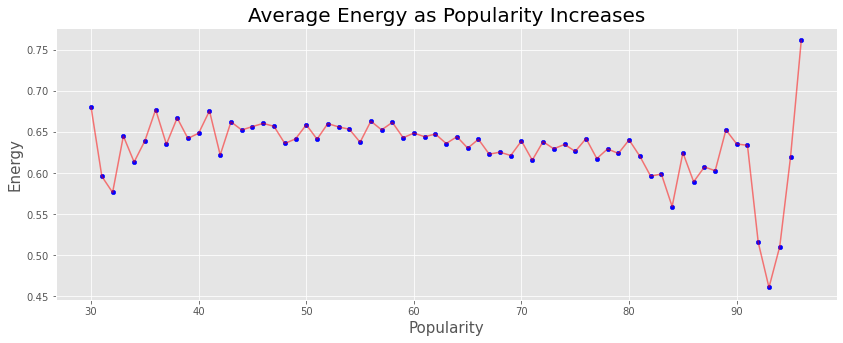

In [83]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(avg_energy.index,avg_energy.energy,color='red',alpha=0.5)
ax.scatter(avg_energy.index,avg_energy.energy,color='blue',s=20)
ax.set_title('Average Energy as Popularity Increases',fontsize=20)
ax.set_xlabel('Popularity',fontsize=15)
ax.set_ylabel('Energy',fontsize=15)

In [42]:
r,p = stats.pearsonr(avg_energy.index,avg_energy.energy)
r,p # yes, based on p-value being less than my significance level, i'm going to reject my null hypothesis alpha = 0.05

(-0.38653920637523254, 0.0012336107098958485)

In [43]:
pop_inst = popularity_asc[['artists','name','popularity','instrumentalness']]
pop_inst

,artists,name,popularity,instrumentalness
18323,['Robin Trower'],Farther on up the Road - 2012 Remaster,30,0.000392
58403,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.000000
76483,"['Above & Beyond', 'Zoë Johnston']",Reverie - Above & Beyond Club Mix,30,0.064800
108469,"['Iggy Azalea', 'Charli XCX']",Fancy,30,0.000000
58385,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.000000
...,...,...,...,...
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94,0.000000
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95,0.000052
19976,['KAROL G'],BICHOTA,95,0.000493
19866,['Ariana Grande'],positions,96,0.000000


In [44]:
avg_inst = pop_inst.groupby('popularity').mean()
avg_inst

,instrumentalness
popularity,
30,1.472500e-01
31,1.362448e-01
32,1.141435e-01
33,1.833330e-01
34,1.156951e-01
...,...
92,3.977000e-03
93,7.950000e-07
94,2.600000e-02


Text(0, 0.5, 'Instrumentalness')

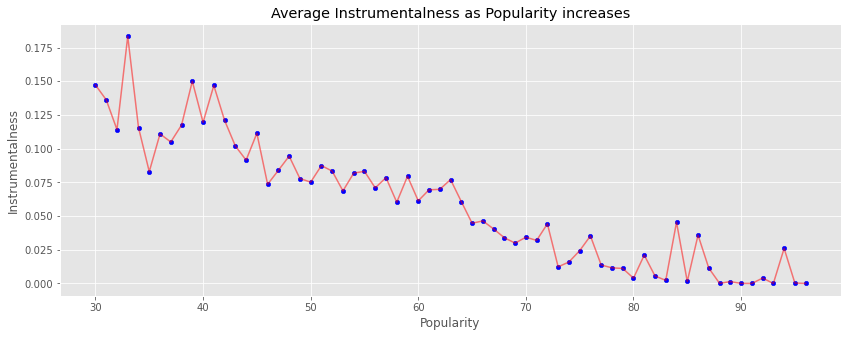

In [94]:
fig, ax = plt.subplots(figsize=(14,5))

ax.plot(avg_inst.index, avg_inst.instrumentalness,color='red',alpha=0.5)
ax.scatter(avg_inst.index, avg_inst.instrumentalness,color='blue',s=20)
ax.set_title('Average Instrumentalness as Popularity increases')
ax.set_xlabel('Popularity')
ax.set_ylabel('Instrumentalness')

In [49]:
r,p = stats.pearsonr(avg_inst.index, avg_inst.instrumentalness)
r,p

(-0.9350585773884214, 5.579106125150611e-31)

In [50]:
pop_speech = popularity_asc[['artists','name','popularity','speechiness']]
pop_speech

,artists,name,popularity,speechiness
18323,['Robin Trower'],Farther on up the Road - 2012 Remaster,30,0.1730
58403,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.1760
76483,"['Above & Beyond', 'Zoë Johnston']",Reverie - Above & Beyond Club Mix,30,0.0472
108469,"['Iggy Azalea', 'Charli XCX']",Fancy,30,0.0744
58385,['Armin van Buuren'],A State Of Trance (ASOT 996) - Tune Of The Yea...,30,0.3080
...,...,...,...,...
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94,0.2860
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95,0.0544
19976,['KAROL G'],BICHOTA,95,0.1520
19866,['Ariana Grande'],positions,96,0.0878


In [51]:
avg_speech = pop_speech.groupby('popularity').mean()
avg_speech

,speechiness
popularity,
30,0.152673
31,0.091273
32,0.108663
33,0.056487
34,0.079965
...,...
92,0.173600
93,0.203750
94,0.132320


Text(0, 0.5, 'Speechiness')

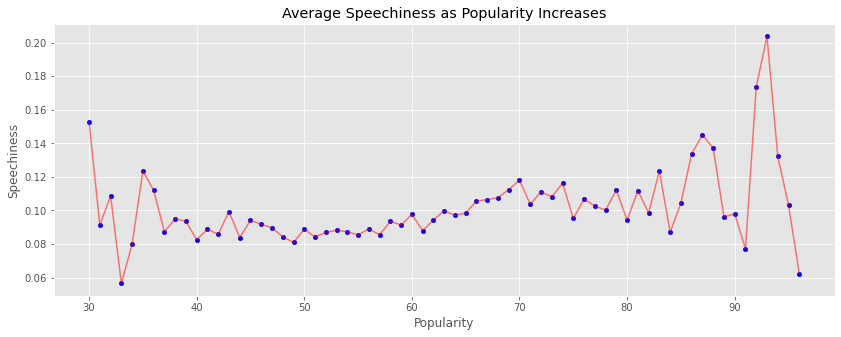

In [92]:
fig, ax = plt.subplots(figsize=(14,5))

ax.plot(avg_speech.index,avg_speech.speechiness,color='red',alpha=0.5)
ax.scatter(avg_speech.index,avg_speech.speechiness,color='blue',s=20)
ax.set_title('Average Speechiness as Popularity Increases')
ax.set_xlabel('Popularity')
ax.set_ylabel('Speechiness')


In [65]:
r,p = stats.pearsonr(avg_speech.index,avg_speech.speechiness)
r,p

(0.38599880657089164, 0.0012549387454434571)

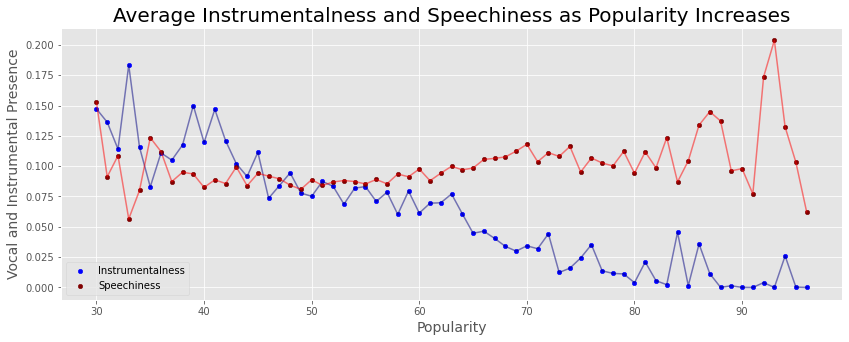

In [110]:
fig, ax = plt.subplots(figsize=(14,5))

ax.scatter(avg_inst.index, avg_inst.instrumentalness,color='blue',label='Instrumentalness',s=20)
ax.scatter(avg_speech.index,avg_speech.speechiness,color='maroon',label='Speechiness',s=20)
ax.plot(avg_inst.index, avg_inst.instrumentalness,color='navy',alpha=0.5)
ax.plot(avg_speech.index,avg_speech.speechiness,color='red',alpha=0.5)
ax.set_title('Average Instrumentalness and Speechiness as Popularity Increases',fontsize=20)
ax.set_xlabel('Popularity',fontsize=14)
ax.set_ylabel('Vocal and Instrumental Presence',fontsize=14)

ax.legend()

# Gathering Binary Data

### Looking at the Count of Songs that are in Major (1) and Minor Keys (0)

<AxesSubplot:>

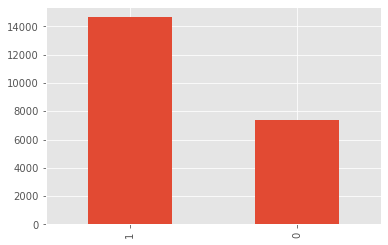

In [110]:
maj_min = popularity_asc['mode'].value_counts().plot(kind='bar')
maj_min

In [54]:
popularity_asc[['mode','popularity']].groupby('mode').mean()

,popularity
mode,
0,59.350568
1,57.754542


In [60]:
major = popularity_asc[['popularity']][popularity_asc['mode'] == 1]
minor = popularity_asc[['popularity']][popularity_asc['mode'] == 0]

t,p = stats.ttest_ind(minor,major,equal_var = False)
t,p

(array([10.37547911]), array([3.93234546e-25]))

# Comparing Count of Tracks that aren't explicit (0), and are explicit (1)

**Null:**
**Alternate:**

<AxesSubplot:>

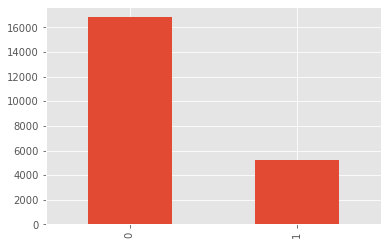

In [104]:
explicit = popularity_asc['explicit'].value_counts().plot(kind="bar")
explicit

In [52]:
popularity_asc[['artists','name','popularity','explicit']].groupby('explicit').mean()

,popularity
explicit,
0,57.089957
1,62.151666


In [51]:
not_explicit = popularity_asc[['popularity']][popularity_asc['explicit'] == 0]
is_explicit = popularity_asc[['popularity']][popularity_asc['explicit'] == 1]

t,p = stats.ttest_ind(not_explicit,is_explicit,equal_var=False)
t,p

(array([-30.32590426]), array([4.93236088e-192]))